In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

d = load_diabetes()
X = pd.DataFrame(d.data, columns=d.feature_names)
y = pd.Series(d.target)  

print(X.corrwith(y).sort_values(ascending=False))

def run(features):
    Xtr,Xte,ytr,yte = train_test_split(X[features], y, test_size=0.2, random_state=0)
    m = LinearRegression().fit(Xtr, ytr)
    p = m.predict(Xte)
    print(features, "MSE:", mean_squared_error(yte, p), "R2:", r2_score(yte, p))

run(["bmi","s5"])
run(["bmi","s5","bp"])
run(list(X.columns))


bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
dtype: float64
['bmi', 's5'] MSE: 3673.952037823258 R2: 0.2835404995530828
['bmi', 's5', 'bp'] MSE: 3417.637685191598 R2: 0.3335245089122949
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] MSE: 3424.2593342986925 R2: 0.3322332173106183


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


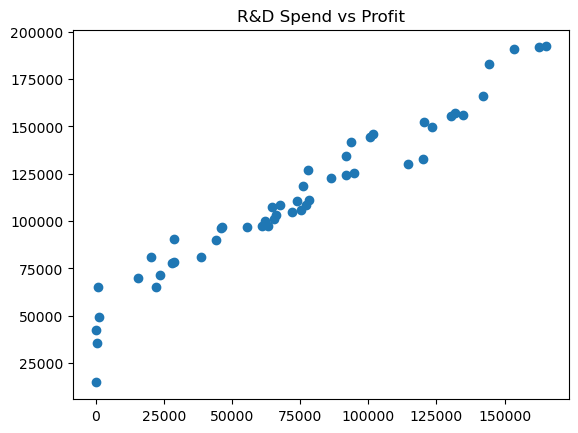

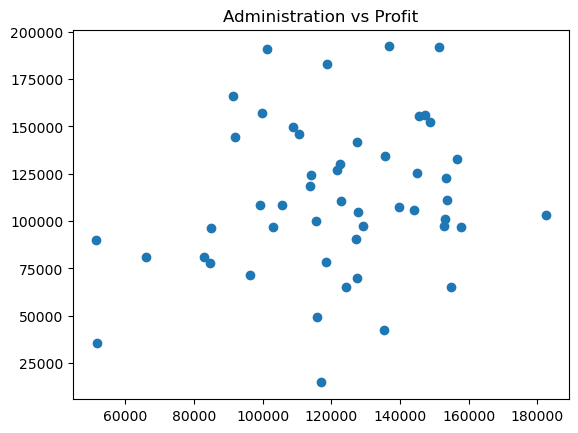

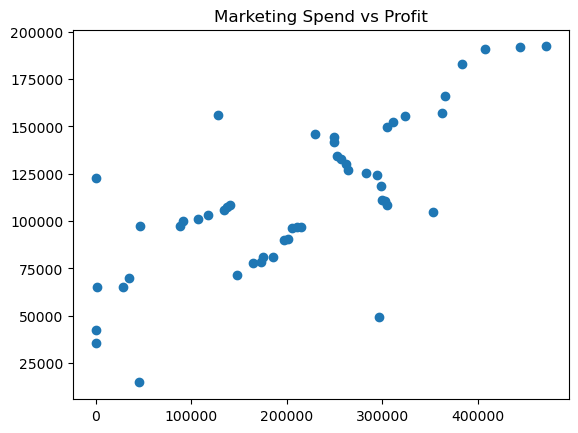

Train RMSE: 9052.267248800475
Train R2: 0.9499572530324031
Test RMSE: 8803.775790469348
Test R2: 0.939395591782057


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("50_Startups (1).csv")

print(df.columns)

print(df.drop("State", axis=1).corr())

X = df[["R&D Spend", "Administration", "Marketing Spend"]]
y = df["Profit"]

for col in X.columns:
    plt.scatter(df[col], y)
    plt.title(col + " vs Profit")
    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred  = model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Train R2:", r2_score(y_train, train_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, test_pred)))
print("Test R2:", r2_score(y_test, test_pred))


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

df = pd.read_csv("Auto.csv", na_values='?').dropna()

X = df.drop(['mpg','name','origin'], axis=1)
y = df['mpg']

for alpha in [0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha).fit(X_train, y_train)
    lasso = Lasso(alpha, max_iter=10000).fit(X_train, y_train)
    print(alpha, "Ridge R²:", ridge.score(X_test, y_test),
          "Lasso R²:", lasso.score(X_test, y_test))

0.01 Ridge R²: 0.9393955917820154 Lasso R²: 0.9393955917893326
0.1 Ridge R²: 0.9393955917816402 Lasso R²: 0.9393955918477549
1 Ridge R²: 0.9393955917778882 Lasso R²: 0.9393955925503303
10 Ridge R²: 0.939395591740369 Lasso R²: 0.9393955986818686
